In [25]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
mi_df = pd.read_pickle(DATA_DIR / 'mi' / 'childes_indv_ami.pickle')

In [28]:
mi_df['shuffling'] = "full"

In [29]:
mi_df

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words,shuffling
0,"[0.38721355926673623, 0.2940603145404564, 0.24...","[6.4158670938439775, 6.3959801429100445, 6.375...","[0.13132725078118673, 0.13203050652023965, 0.1...","[6.4214196972873, 6.407626644686404, 6.3937540...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1.5,15154,5439,full
1,"[0.2859134717386194, 0.18579558543520222, 0.15...","[7.497267907719095, 7.4886567926354, 7.4809899...","[0.07428331676129152, 0.07483299273433702, 0.0...","[7.498527155330897, 7.492941949008011, 7.48457...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1.5,2.0,57580,19538,full


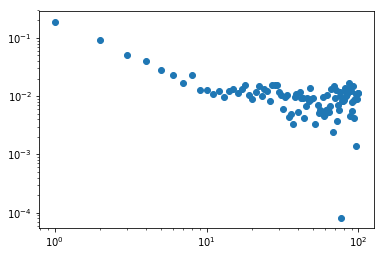

In [61]:
row = mi_df.iloc[0]
fig, ax = plt.subplots()
ax.scatter(row.distances, row.MI-row.shuff_MI - 0.07)
ax.plot(row.distances, row.MI-row.shuff_MI - 0.07, alpha = 0)
ax.set_yscale('log')
ax.set_xscale('log')
#plt.loglog(row.distances, row.shuff_MI)

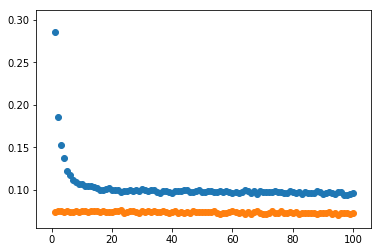

In [64]:
row = mi_df.iloc[1]
fig, ax = plt.subplots()
ax.scatter(row.distances, row.MI)
ax.scatter(row.distances, row.shuff_MI)
#ax.set_yscale('log')
##ax.set_xscale('log')
#plt.loglog(row.distances, row.shuff_MI)

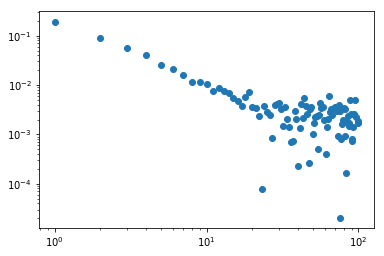

In [58]:
row = mi_df.iloc[1]
fig, ax = plt.subplots()
ax.scatter(row.distances, row.MI-row.shuff_MI - 0.022)
ax.plot(row.distances, row.MI-row.shuff_MI - 0.022, alpha = 0)
ax.set_yscale('log')
ax.set_xscale('log')
#plt.loglog(row.distances, row.shuff_MI)

In [32]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

full


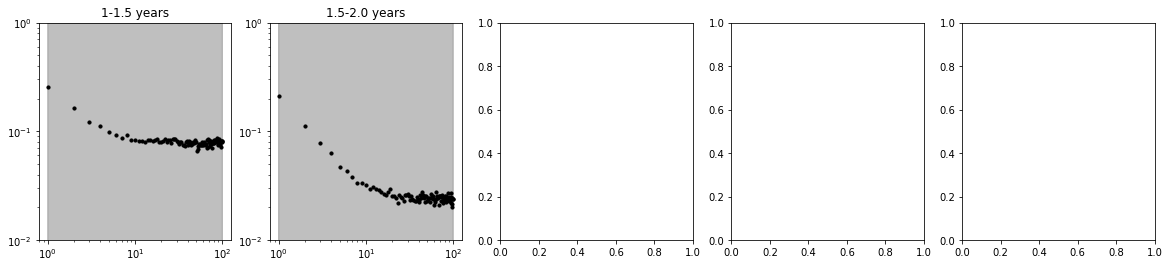

In [38]:
for shuff in ['full']:
    print(shuff)
    fig, axs = plt.subplots(ncols=len(age_cohorts), figsize=(4*len(age_cohorts),4))

    for axi, (idx, row) in enumerate(mi_df.iterrows()):
        if row.shuffling != shuff: 
            continue
        MI = row.MI-row.shuff_MI
        MI_var = row.MI_var
        #ax.scatter(distances, row.MI-row.shuff_MI)
        ax = axs[np.array([i[0] for i in age_cohorts]) == row.age_cohort_low][0]
        #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
        ax.scatter(row.distances, row.MI-row.shuff_MI, s=10, color='k')
        ax.fill_between(row.distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
        #ax.legend()
        ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
        ax.set_ylim([1e-2,1])
        #ax.set_xlim([1, 100])

        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()